In [33]:
ls

1.competition_trainset/  Anaconda3-2021.05-Linux-x86_64.sh*  names.txt
11819_darknet/           Makefile                            test.txt*
16835_darknet/           anaconda3/                          train.txt
2.testset/               examples.desktop
3.backsub_images_100/    merge.ipynb


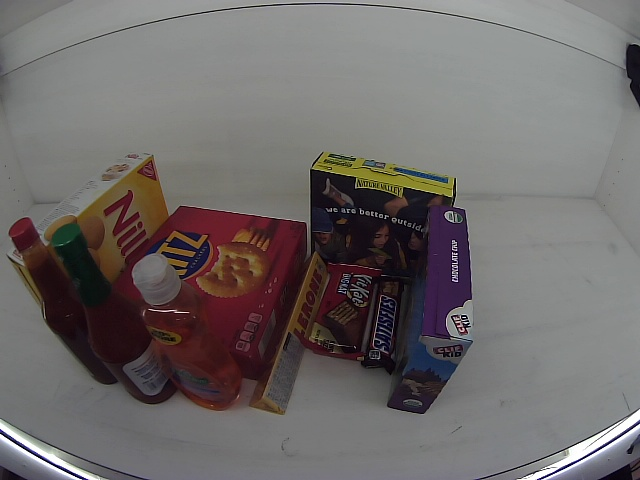

In [34]:
from IPython.display import Image
Image("/home/ai_competition6/1.competition_trainset/1_dataset/Close_CAPP_cam1_10_12835.jpg")

In [35]:
f = open("/home/ai_competition6/1.competition_trainset/1_dataset/Close_CAPP_cam1_10_12835.txt", "r")
line = f.readlines()
print(*line)

38 0.29140625 0.690625 0.1734375 0.33125
 39 0.17890625 0.653125 0.1984375 0.3770833333333333
 37 0.32578125 0.6104166666666667 0.3078125 0.36666666666666664
 34 0.45234375 0.69375 0.1296875 0.3458333333333333
 32 0.53515625 0.6489583333333333 0.1265625 0.20625
 33 0.59765625 0.6770833333333334 0.0671875 0.2125


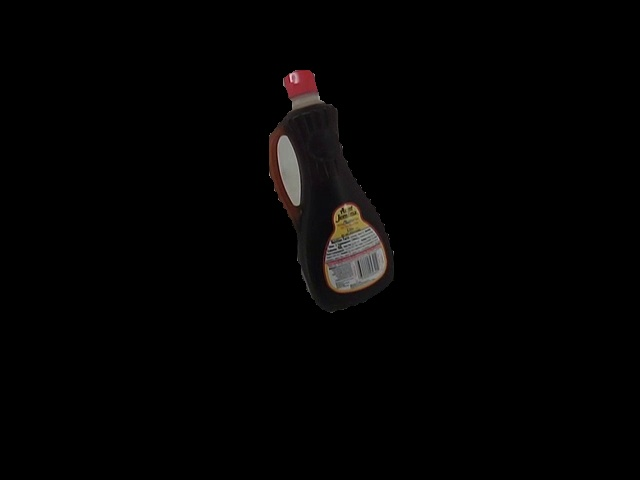

In [37]:
Image("/home/ai_competition6/3.backsub_images_100/0.aunt_jemima_original_syrup/aunt_jemima_original_syrup_2306.jpg")

In [3]:
f = open("/home/ai_competition6/3.backsub_images_100/0.aunt_jemima_original_syrup/aunt_jemima_original_syrup_2306.txt", "r")
line = f.readlines()
print(*line)

0 0.5203125 0.39479166666666665 0.2 0.5020833333333333


==============================================================================================

# Merge by 병욱

### 1. input 파일
    - backsub 이미지 (640x480, .jpg)
    - backsub 이미지의 box 중심,길이 데이터 (.txt)
    
### 2. 구현방식
    - 4~5개의 틀을 만들고
    - 해당 틀에 들어가는 n개의 이미지를 선택하여 조합 생성
    - ex. 위2개/아래3개 모양의 틀을 1번, 위2개/중간2개/아래2개 모양의 틀을 2번이라 할 경우,
      1번틀에 들어가는 이미지 5개를 선택해 이미지 1000개 생성,
      2번틀에 들어가는 이미지 6개를 선택해 이미지 1000개 생성
      이런식으로 이미지 조합 여러개 생성 가능
      
### 3. output 파일
    - 640x480의 새로운 조합 이미지 (.jpg)
    - 해당 이미지의 box 데이터 (.txt)

In [2]:
import PIL
from PIL import Image
img = Image.open("/home/ai_competition6/3.backsub_images_100/0.aunt_jemima_original_syrup/aunt_jemima_original_syrup_2306.jpg")

# create new empty image
size = (640, 480)
new_image = Image.new('RGB', size, (0, 0, 0))

# cut image along the anchor box
f = open("/home/ai_competition6/3.backsub_images_100/0.aunt_jemima_original_syrup/aunt_jemima_original_syrup_2306.txt", "r")
line = f.readlines()
w, h = img.size
n_s = line[0].split()
n = [float(i) for i in n_s]
box_f = (w*(n[1]-n[3]/2), h*(n[2]-n[4]/2), w*(n[1]+n[3]/2), h*(n[2]+n[4]/2))
box = [int(i) for i in box_f]
cropped = img.crop(box)
print(h, w)
print(box)

#paste cropped image to empty image
new_image.paste(cropped)
new_image.show()


480 640
[269, 69, 396, 309]
